In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from math import isnan

data = pd.read_csv('m8.23_gold_clean.csv')
data = data.rename(columns = {'ts': 'unixtime'})
data['ts'] = pd.to_datetime(data.unixtime)
data = data[(data.ts >= '2018-02-10') & (data.ts <= '2018-02-22')]

print(f'len(data) = {len(data)}')
data.head()

#В следующих заданиях требуется делать различные разбиения исходного ряда.

len(data) = 10792


,unixtime,open,high,low,close,vol,ts
39280,1518220800000000000,1316.7,1317.1,1316.7,1317.0,259,2018-02-10 00:00:00
39281,1518220860000000000,1317.0,1317.0,1316.6,1316.7,103,2018-02-10 00:01:00
39282,1518220920000000000,1316.8,1317.1,1316.7,1317.1,139,2018-02-10 00:02:00
39283,1518220980000000000,1317.0,1317.6,1317.0,1317.5,198,2018-02-10 00:03:00
39284,1518221040000000000,1317.6,1318.3,1317.6,1318.1,218,2018-02-10 00:04:00


#### Задание 8.23.1

Сделайте линейное (последовательное) разбиение, используя функцию np.split, в качестве коэффициента разбиения возьмите 0.6 (60% — тренировочный сет, 40% — тестовый). Укажите значение объёма (vol) первой строки тестового сета.

In [12]:
#https://stackoverflow.com/questions/55662700/whats-the-most-efficient-way-to-split-up-a-numpy-ndarray-using-percentage

df = data.copy()
# splitCoef = 0.6 # 60 - тренировочный сет, 40 - тестовый сет

# percentages (ratios) array
p = np.array([0.6, 0.4]) # must sum upto 1
features_train, features_test = np.split(df, (len(df)*p[:-1].cumsum()).astype(int))

features_test.head()
# 934 is correct

,unixtime,open,high,low,close,vol,ts
45755,1518800460000000000,1358.0,1358.0,1356.6,1356.6,934,2018-02-16 17:01:00
45756,1518800520000000000,1356.7,1357.2,1356.3,1356.4,665,2018-02-16 17:02:00
45757,1518800580000000000,1356.4,1356.6,1355.8,1356.5,678,2018-02-16 17:03:00
45758,1518800640000000000,1356.5,1357.0,1356.5,1356.9,253,2018-02-16 17:04:00
45759,1518800700000000000,1356.9,1356.9,1356.4,1356.7,304,2018-02-16 17:05:00


#### Задание 8.23.2
Напишите фунцкию множественного разбиения, используя np.array_split и concat. Сделайте разбиение на пять частей, используйте три из них для тренировочного сета. Укажите значение объёма (vol) последней строки тренировочного сета.

In [13]:
#https://stackoverflow.com/questions/55662700/whats-the-most-efficient-way-to-split-up-a-numpy-ndarray-using-percentage
df = data.copy()

a1, a2, a3, a4, a5 = np.array_split(df, 5)
a123 = pd.concat([a1, a2, a3])

train_set = a123
train_set.tail()
# 934 is correct

,unixtime,open,high,low,close,vol,ts
45751,1518800220000000000,1358.7,1358.7,1358.2,1358.2,244,2018-02-16 16:57:00
45752,1518800280000000000,1358.2,1358.4,1358.2,1358.2,100,2018-02-16 16:58:00
45753,1518800340000000000,1358.2,1358.4,1358.0,1358.2,293,2018-02-16 16:59:00
45754,1518800400000000000,1358.3,1358.3,1357.8,1358.0,143,2018-02-16 17:00:00
45755,1518800460000000000,1358.0,1358.0,1356.6,1356.6,934,2018-02-16 17:01:00


In [14]:
df = data.copy()
# splitCoef = 0.6 # 60 - тренировочный сет, 40 - тестовый сет

# percentages (ratios) array
p = np.array([0.6, 0.4]) # must sum upto 1
features_train, features_test = np.split(df, (len(df)*p[:-1].cumsum()).astype(int))

features_test.head()
# 934 is correct

,unixtime,open,high,low,close,vol,ts
45755,1518800460000000000,1358.0,1358.0,1356.6,1356.6,934,2018-02-16 17:01:00
45756,1518800520000000000,1356.7,1357.2,1356.3,1356.4,665,2018-02-16 17:02:00
45757,1518800580000000000,1356.4,1356.6,1355.8,1356.5,678,2018-02-16 17:03:00
45758,1518800640000000000,1356.5,1357.0,1356.5,1356.9,253,2018-02-16 17:04:00
45759,1518800700000000000,1356.9,1356.9,1356.4,1356.7,304,2018-02-16 17:05:00


In [15]:
#version 2
def multi_split(data):
    splits = np.array_split(data, 5)
    train = pd.concat(splits[:3])
    test = pd.concat(splits[3:])
    return train, test
train, test = multi_split(data)
train.vol.iloc[-1]

934

#### Задание 8.23.3
Напишите функцию walk forward-разбиения. Запустите её с параметрами n_splits=10, n_train=3, n_test=1, fold=1, укажите значение последнего элемента unixtime тестового сета.

Разбиение имелось в виду вот такое: данные делятся на 10 частей, 3 части идут в train, 1 часть - в test. А fold означает смещение - мы же можем train и test сдвигать по времени.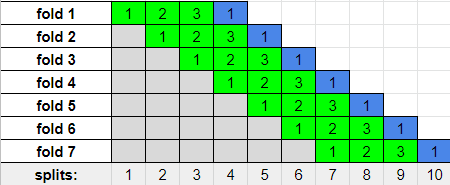

In [48]:
splits = np.array_split(df, 10)
n_train = 3
n_records = len(splits) #n_splits
for i in range(n_train, n_records):
    train, test = splits[i-3:i], splits[i:i+1]
    print('train=%d, test=%d' % (len(train), len(test)))
    #print(f'i = {i-3} ; test[-1] = {test[-1]}')

#1518667200000000000 is correct (last unixtime of the first test set

train=3, test=1
train=3, test=1
train=3, test=1
train=3, test=1
train=3, test=1
train=3, test=1
train=3, test=1
